In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
def hamil(x,p):
    return np.exp(-(x*x/2 + p*p/2))  #1-D Harmonic oscillator

In [3]:
def pe(x):
    return x

def ke(x):
    return x

In [4]:
def gaus(x):
    return np.exp(-(x*x)/2)

In [5]:
epsi = 0.01
y = np.arange(-0.4,0.5,0.01)
n=100000
m = 100
x = np.zeros(n)
p = np.zeros(n)
xtemp = np.zeros(m)
ptemp = np.zeros(m)
x[0] = 0.5
kount = 0

In [6]:
for i in range(0,n-1):
    p[i] = np.random.normal()
    ptemp[0]=p[i]
    xtemp[0]=x[i]
    for j in range(0,m-1):
        temp = ptemp[j]-epsi*pe(xtemp[j])/2                        
        xtemp[j+1] = xtemp[j]+epsi*ke(temp)            # Leapfrog to calculate the next sample in the chain
        ptemp[j+1] = temp-(epsi*pe(xtemp[j+1])/2)
    ratio = hamil(xtemp[m-1],ptemp[m-1])/hamil(x[i],p[i])    
    alpha = np.random.uniform()
    if alpha<min(1,ratio):   # acceptance step
        x[i+1]=xtemp[m-1]
        kount = kount + 1
    else:
        x[i+1]=x[i]
print('Ratio of samples accepted to the total number of samples') 
print(kount/n)

Ratio of samples accepted to the total number of samples
0.99999


Text(0, 0.5, 'Density')

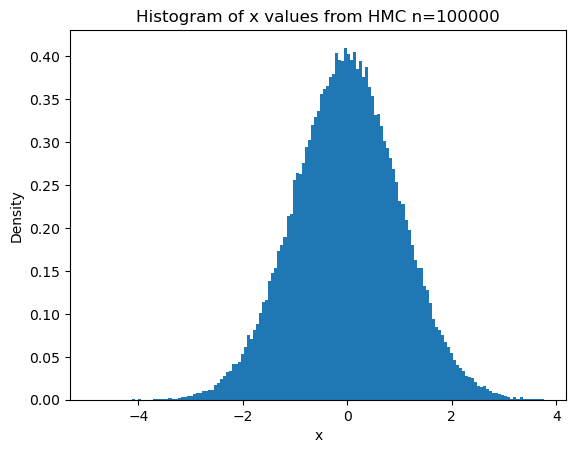

In [7]:

plt.hist(x,density=True,bins='auto')
#plt.plot(y,gaus(y))
#plt.xlim(-0.6,0.6)
plt.title('Histogram of x values from HMC n=100000')
plt.xlabel('x')
plt.ylabel('Density')



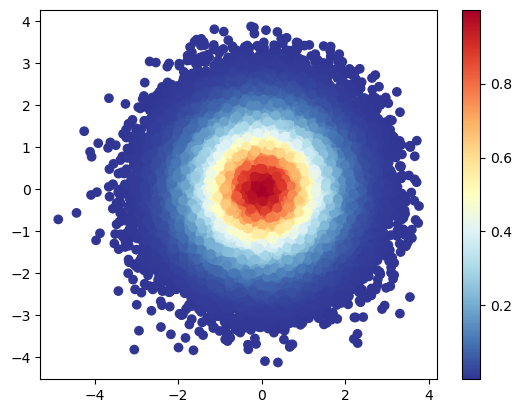

In [8]:
prob = hamil(x,p)
plt.scatter(x,p,c=prob,cmap='RdYlBu_r')
plt.colorbar()
plt.show()

Text(0, 0.5, 'x')

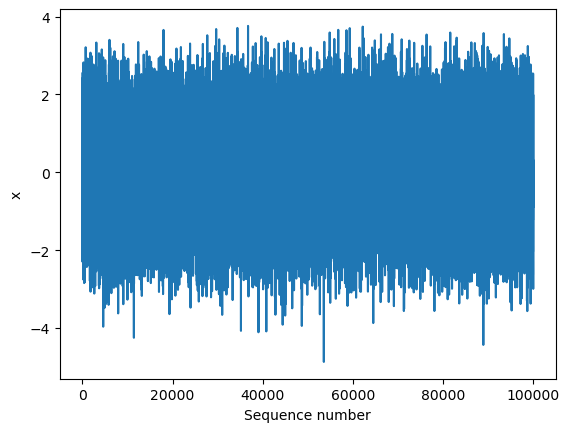

In [9]:
plt.plot(x)
plt.xlabel('Sequence number')
plt.ylabel('x')